# Stress Detection Models 

In this notebook we are going to be testing three approaches for stress detection using biosignals like Heart Rate and/or Heart Rate Variability for each one of the following datasets:

1. [Nurse Stress Prediction Wearable Sensors](https://www.kaggle.com/datasets/priyankraval/nurse-stress-prediction-wearable-sensors)
2. [Heart Rate Prediction to Monitor Stress Level](https://www.kaggle.com/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level)
3. [Stress-Predict-Dataset](https://github.com/italha-d/Stress-Predict-Dataset)
4. [SWELL dataset](https://www.kaggle.com/datasets/qiriro/swell-heart-rate-variability-hrv)




In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, StandardScaler



# Import Data Paths
data_path = os.getcwd() + "/data" 

---

# Nurse Stress Prediction Wearable Sensors

In [ ]:
# Load the dataset
data = pd.read_csv(data_path + "/Healthcare/hrv.csv")
print(data.info())

# Feature Engineering and Scaling

#HR
HR_scaler=StandardScaler()
data['HR']=HR_scaler.fit_transform(np.array(data['HR']).reshape(len(data['HR']),1))

# HRV
HRV_scaler=StandardScaler()
data['HRV']=HRV_scaler.fit_transform(np.array(data['HRV']).reshape(len(data['HRV']),1))


# Features and Labels
features = data.drop(columns=['label', 'datetime', "HR"],axis=1)
labels = data['label']

features_train, features_test, labels_train, labels_test= train_test_split(features, labels, test_size=0.2,random_state=34)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332307 entries, 0 to 332306
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   HR        332307 non-null  float64
 1   HRV       332295 non-null  float64
 2   datetime  332307 non-null  object 
 3   label     332307 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 10.1+ MB


In [ ]:
# Create callback function for early stopping in case we have a decrease in accuracy
callback = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=True, mode='auto', baseline=None, restore_best_weights=True)

# Create the Deep Learning Model Architecture
model = Sequential()
model.add(Dense(features_train.shape[1],activation='relu',input_shape=(features_train.shape[1],)))
model.add(Dense(4,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-21 23:50:19.511839: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2025-04-21 23:50:19.511867: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-04-21 23:50:19.511872: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-04-21 23:50:19.511894: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-21 23:50:19.511906: I tensorflow/core/common_runtime/pluggable_device/pluggable_d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history=model.fit(features_train, labels_train, validation_split=0.2, epochs=10, verbose=True, batch_size=1000,callbacks=callback)

Epoch 1/10


2025-04-21 23:50:20.220812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


213/213 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6723 - loss: 1.0394 - val_accuracy: 0.7399 - val_loss: 0.7990
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7420 - loss: 0.7656 - val_accuracy: 0.7399 - val_loss: 0.7319
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7424 - loss: 0.7260 - val_accuracy: 0.7399 - val_loss: 0.7295
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7416 - loss: 0.7264 - val_accuracy: 0.7399 - val_loss: 0.7295
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7422 - loss: 0.7258 - val_accuracy: 0.7399 - val_loss: 0.7294
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7415 - loss: 0.7267 - val_accuracy: 0.7399 - val_loss: 0.7295
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7419 - loss: 0.7255 - val_accuracy: 0.7399 - val_loss: 0.7294
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7426 - loss: 0.7244 - val_accuracy: 0.739

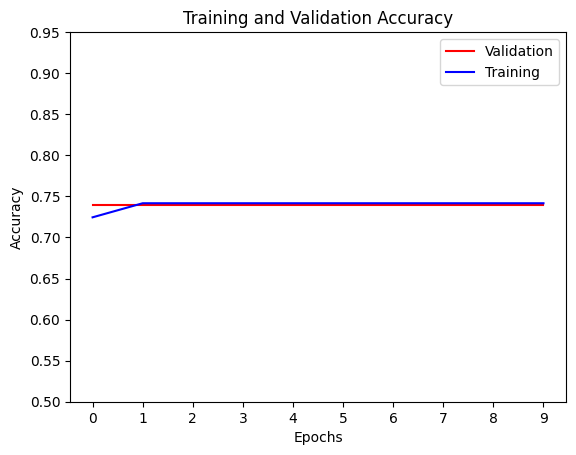

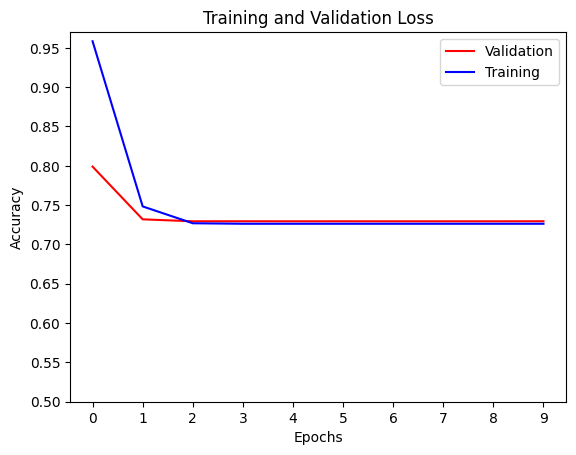

In [22]:
#Traininng Visualization
plt.plot(history.history['val_accuracy'],color='red',label='Validation')
plt.plot(history.history['accuracy'],color='blue',label='Training')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0.5, 1, 0.05))
plt.xlabel('Epochs')    
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


#Traininng Visualization
plt.plot(history.history['val_loss'],color='red',label='Validation')
plt.plot(history.history['loss'],color='blue',label='Training')
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0.5, 1, 0.05))
plt.xlabel('Epochs')    
plt.ylabel('Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [8]:
#Performance on Testing Data
# Evaluate the model on test data
loss, accuracy = model.evaluate(features_test, labels_test)

2077/2077 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7374 - loss: 0.7349


---

# Heart Rate Prediction to Monitor Stress Level